# Hierarchical clustering Python Implementation Using Scikit-learn


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')

def distance(x, y):
    return np.sum((x - y) ** 2)


def score(x,model):
    '''
    cluster: sample pointes
    '''
    score=0
    n_cluster=len(model.cluster_centers_)
    for c in range(n_cluster):
         score+=distance(x[model.labels_==c],model.cluster_centers_[c])

    return score



## Genearte sample data

In [3]:
n1=5
n2=5
# cluster
x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5,n1)
C1=np.array(list(zip(x1,y1)))
# cluster
x2 = np.random.normal(30,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[60.20884125  4.7108212 ]
[35.63435392  4.78556735]


In [4]:
X_train

array([[57.45370042,  3.90710441],
       [54.01551227,  5.79231928],
       [85.76513974,  5.53260301],
       [56.00485917,  4.49813395],
       [47.80499463,  3.82394537],
       [31.65347073,  5.27071976],
       [42.86347937,  4.53359787],
       [32.49272361,  4.84896393],
       [28.63116538,  4.6456984 ],
       [42.53093052,  4.62885677]])

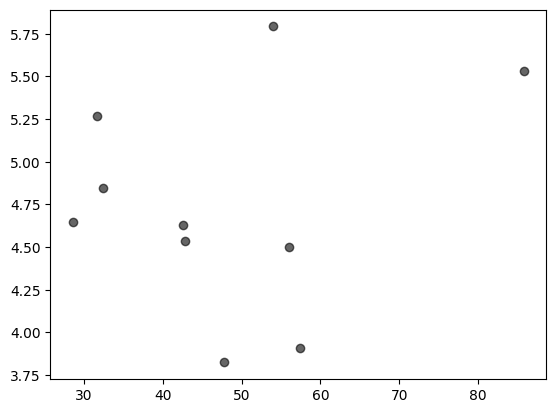

In [5]:
plot_scatter(X_train)
plt.show()

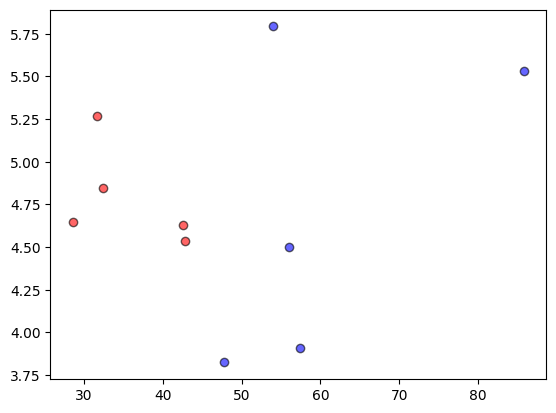

In [6]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [7]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [8]:
acv = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
acv

AgglomerativeClustering(linkage='single')

In [9]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [10]:
acv.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

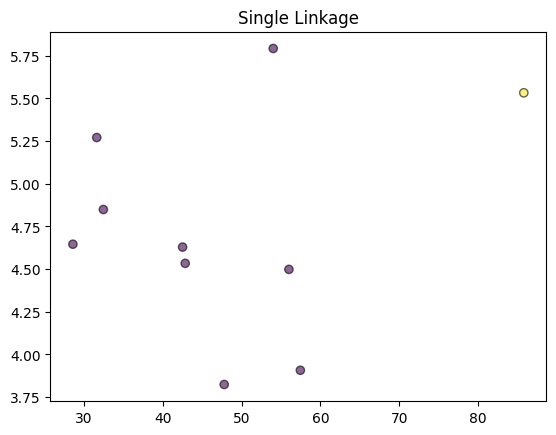

In [11]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Single Linkage")
plt.show()

## plot dendrogram (樹狀圖)

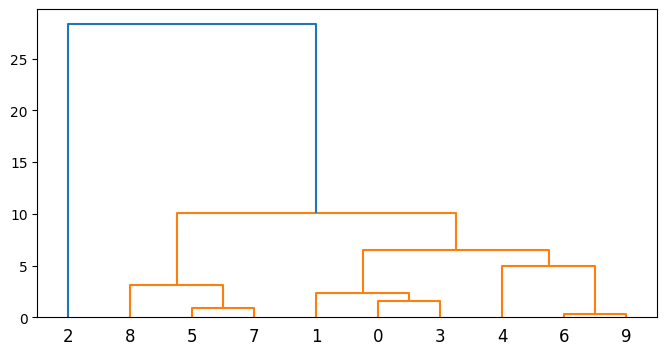

In [12]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()

## Comparing different hierarchical linkage methods

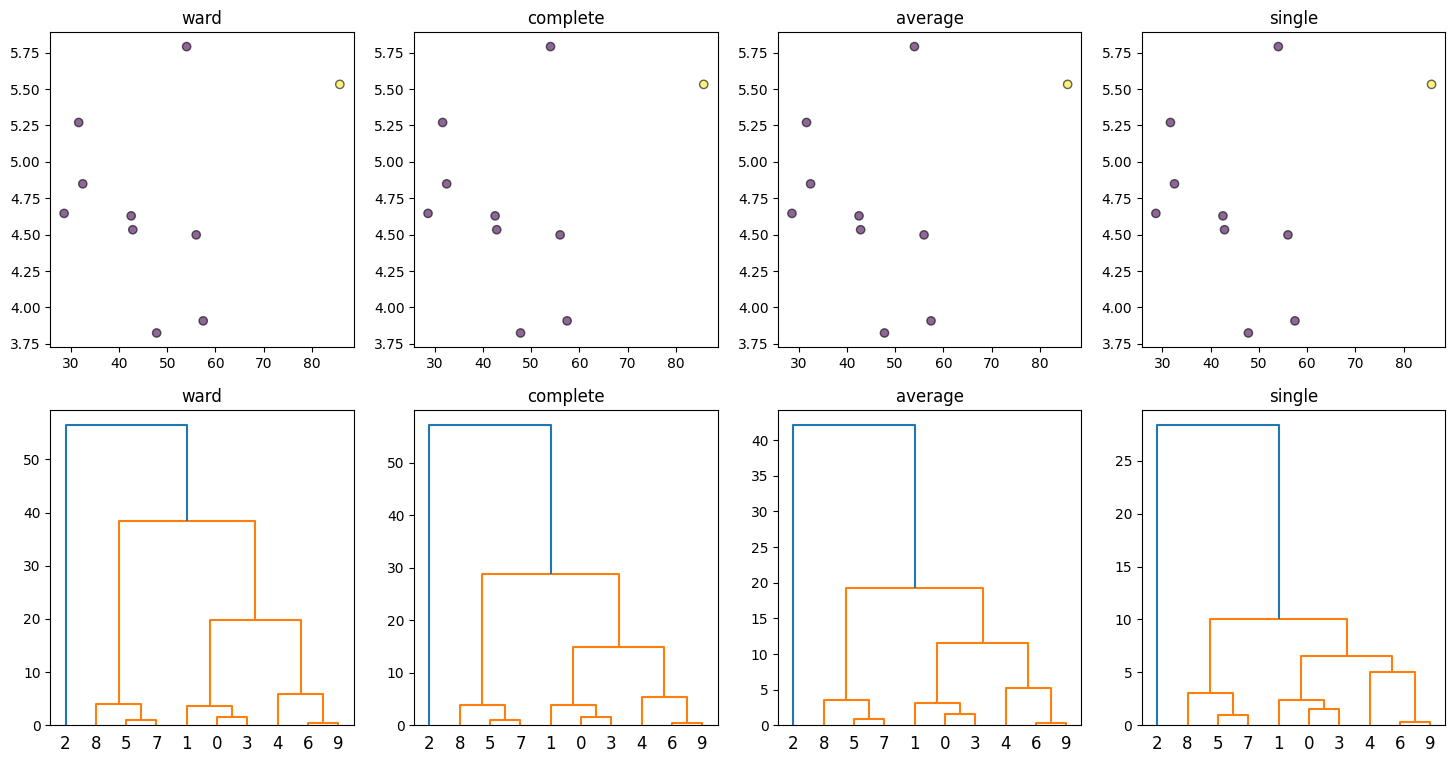

In [13]:

def compare_linkage(X):

    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)
        #plot scatter
        plt.subplot(2,4,i+1)
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)
        plot_dendrogram(X,link)
        plt.title(link)




    plt.show()

compare_linkage(X_train)

## Feature Re-scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[47.92159758  4.74819428]
[15.98421067  0.60693314]


In [15]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)


In [16]:
print('mean:',np.round(np.mean(X_train_std,axis=0),2))
print('std:',np.round(np.std(X_train_std,axis=0),2))

mean: [-0.  0.]
std: [1. 1.]


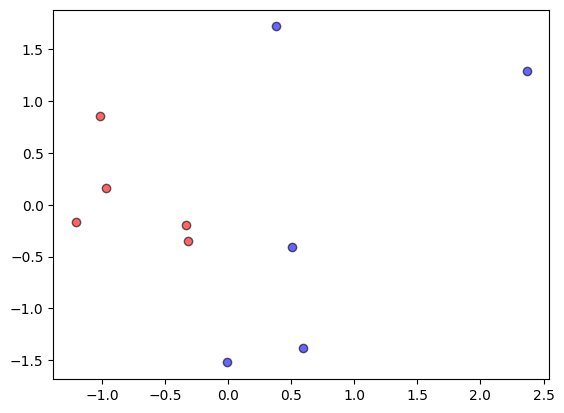

In [17]:
plot_scatter(X_train_std[:n1],color='b')
plot_scatter(X_train_std[n1:],color='r')

In [18]:
acv_std = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(X_train_std)
acv_std

AgglomerativeClustering()

In [19]:
cluster_labels_std=acv_std.fit_predict(X_train_std)
cluster_labels_std

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [20]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

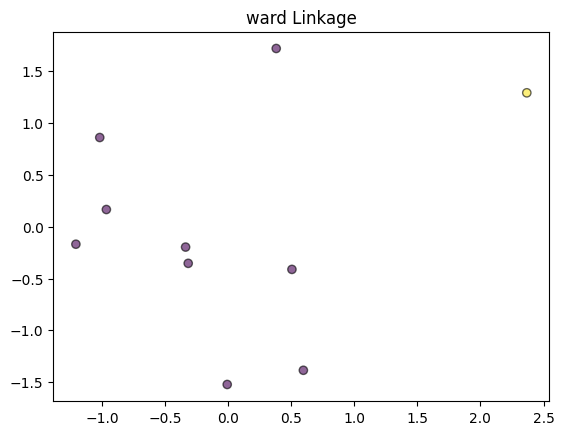

In [21]:
plot_scatter(X_train_std, acv.fit_predict(X_train_std))
plt.title("ward Linkage")
plt.show()

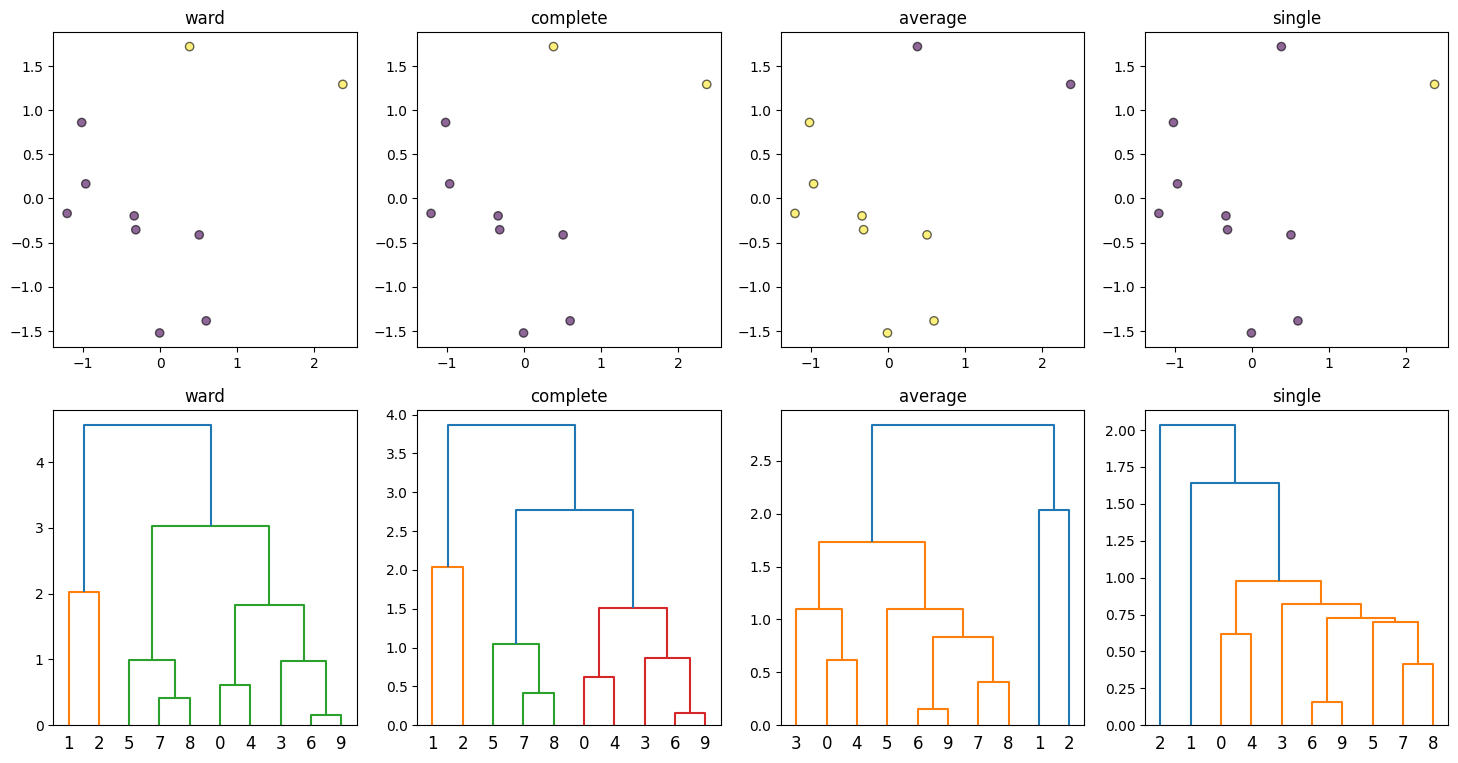

In [22]:
compare_linkage(X_train_std)

# make a circle  Dataset
       make_circles(): Make a large circle containing a smaller circle in 2d
        factor: Scale factor between inner and outer circle. ( 0 < double < 1 (default=.8))

In [23]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05)
X[:10]

array([[-0.97084503, -0.12673179],
       [-0.01989117, -0.45880462],
       [ 0.95036645,  0.21475102],
       [ 0.3868271 ,  0.25685525],
       [-0.53375109, -0.00663921],
       [ 0.34970205, -0.2956982 ],
       [-0.41722927,  0.81854348],
       [-0.47625865,  0.08139568],
       [ 0.42783229,  0.26529816],
       [ 0.36259195, -0.27483444]])

In [24]:
y[:10]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

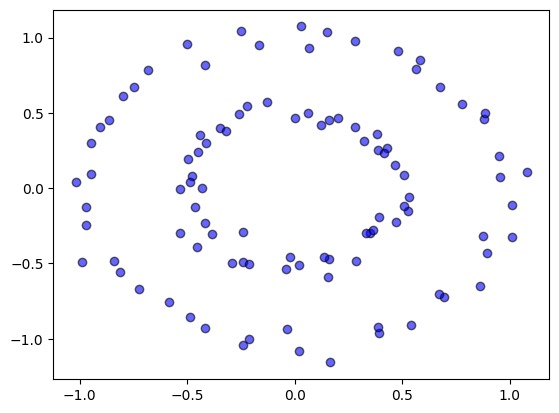

In [25]:
plot_scatter(X,'b')
plt.show()

## Exercise
    clusters=2
    如果使用K-means 結果為何?
    如果使用ACV 結果為何?

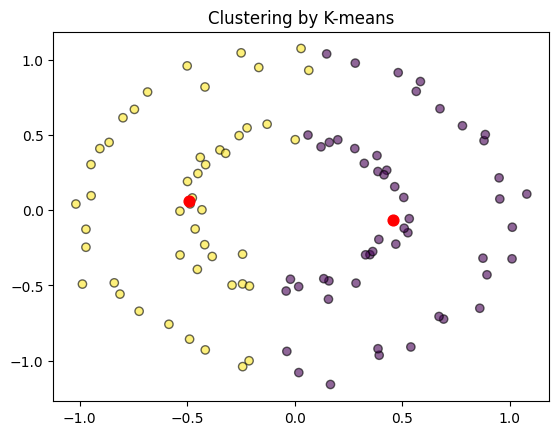

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++',n_clusters=2).fit(X)
plot_scatter(X,kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")
plt.show()

In [27]:
kmeans.cluster_centers_

array([[ 0.45476453, -0.06281469],
       [-0.49251584,  0.06065383]])

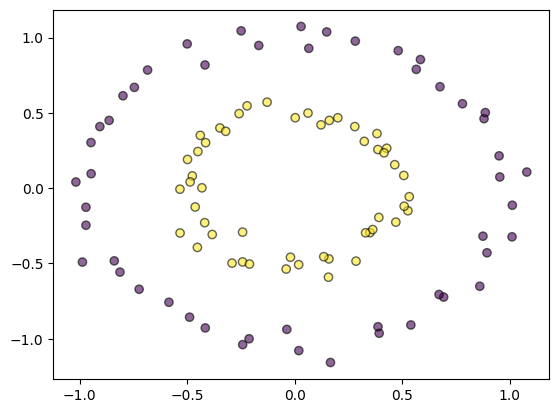

In [28]:
model = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X)
plot_scatter(X,model.fit_predict(X))

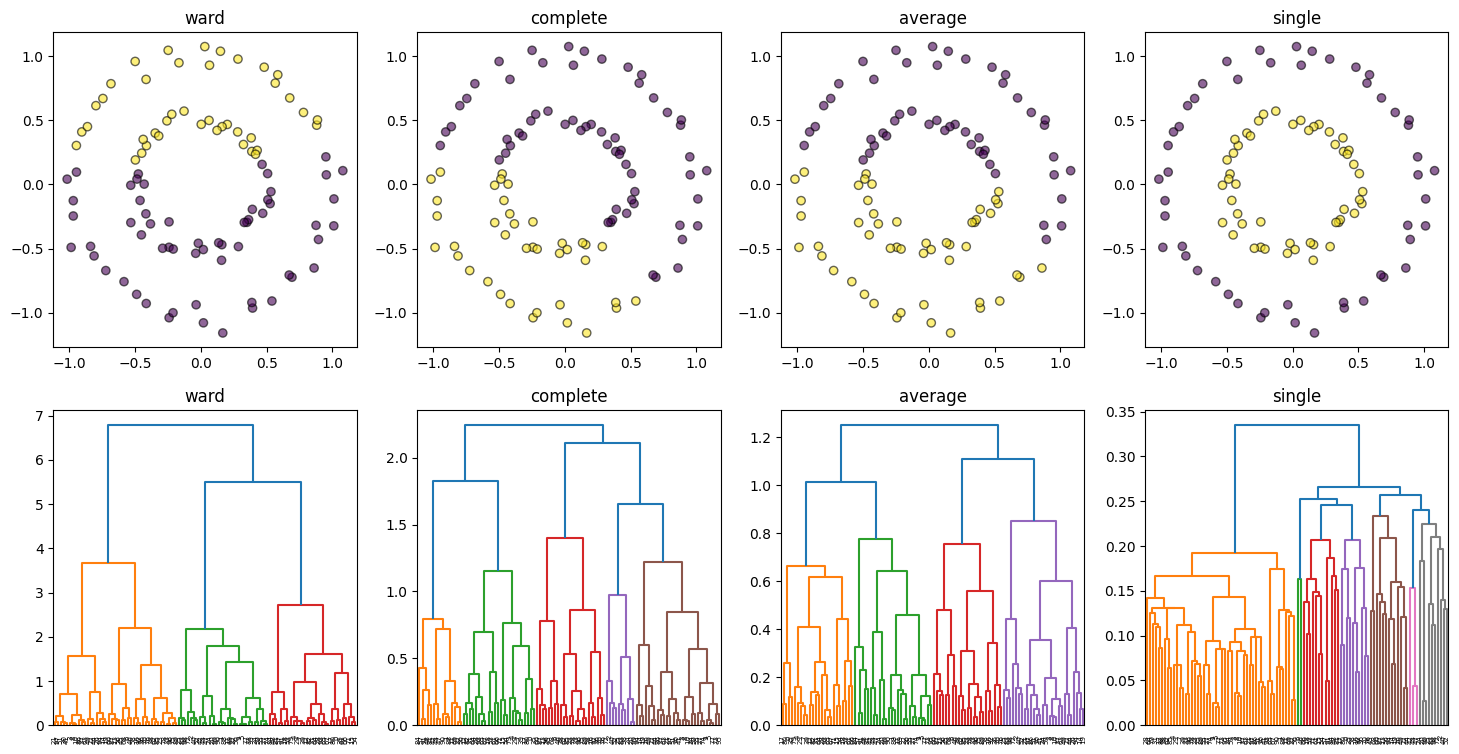

In [29]:
compare_linkage(X)

# Distance matrix

In [30]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles,make_blobs

def min_dist(D):
    minimum=10000
    min_x=0
    min_y=0
    for i in range(D.shape[0]):
        for j in range(i):
            if D[i][j]<minimum:
                minimum=D[i][j]
                min_x=i
                min_y=j
                #print(i,j,D[i][j])

    return (min_x,min_y),minimum



In [31]:
# cluster
x1 = [1,3,4,5,1,4,1,2]  # np.random.normal(mu,sigma,size))
y1 = [3,3,3,3,2,2,1,1]
X_train=np.array(list(zip(x1,y1)))


In [32]:
D = np.round(pairwise_distances(X_train),1)
D

array([[0. , 2. , 3. , 4. , 1. , 3.2, 2. , 2.2],
       [2. , 0. , 1. , 2. , 2.2, 1.4, 2.8, 2.2],
       [3. , 1. , 0. , 1. , 3.2, 1. , 3.6, 2.8],
       [4. , 2. , 1. , 0. , 4.1, 1.4, 4.5, 3.6],
       [1. , 2.2, 3.2, 4.1, 0. , 3. , 1. , 1.4],
       [3.2, 1.4, 1. , 1.4, 3. , 0. , 3.2, 2.2],
       [2. , 2.8, 3.6, 4.5, 1. , 3.2, 0. , 1. ],
       [2.2, 2.2, 2.8, 3.6, 1.4, 2.2, 1. , 0. ]])

In [33]:
D.shape[0]

8

In [34]:
min_dist(D)

((2, 1), np.float64(1.0))

# Homework 比較K_means, ACV

## Datast

In [35]:
# cluster
x1 = [1,3,4,5,1,4,1,2]  # np.random.normal(mu,sigma,size))
y1 = [3,3,3,3,2,2,1,1]
X_train=np.array(list(zip(x1,y1)))
Y_train=np.array(['a','b','b','b','a','b','a','a'])



## Answer

In [36]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

model = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X_train)
model.fit_predict(X_train)

array([1, 0, 0, 0, 1, 0, 1, 1])

In [37]:
kmeans = KMeans(init='k-means++',n_clusters=2).fit(X_train)

In [38]:
kmeans.cluster_centers_

array([[4.  , 2.75],
       [1.25, 1.75]])

In [39]:
kmeans.predict(X_train)

array([1, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

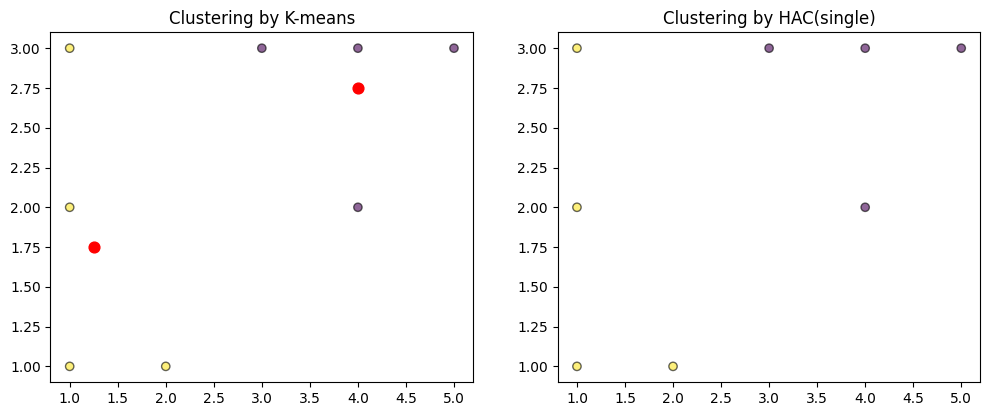

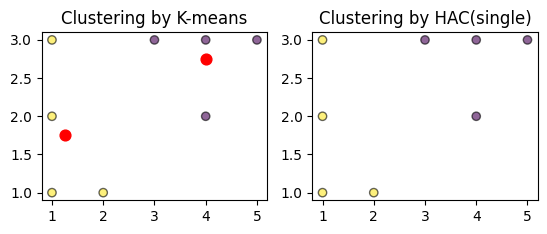

In [40]:
plt.figure(figsize=(12,10))

plt.subplot(221)
plot_scatter(X_train,kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")


plt.subplot(222)
plot_scatter(X_train,model.fit_predict(X_train))
plt.title("Clustering by HAC(single)")
plt.show()

plt.subplot(223)
plot_scatter(X_train,kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=60)
plt.title("Clustering by K-means")


plt.subplot(224)
plot_scatter(X_train,model.fit_predict(X_train))
plt.title("Clustering by HAC(single)")
plt.show()


In [41]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(kmeans.predict(X_train),Y_train)


array([[0, 4],
       [4, 0]])

In [42]:
contingency_matrix(model.fit_predict(X_train),Y_train)

array([[0, 4],
       [4, 0]])